# Setup & Load Data

In [1]:
import logging
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import matplotlib as mpl
import sys
sys.path.append('../')
from matplotlib import ticker
from vistools.utils import *

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

date_lst = pd.date_range('2016-09-01', '2017-04-30')
meta = pd.read_csv('meta.csv')
meta['app_name'] = meta['app'].str[3:]
meta = meta.loc[meta['psn']==0]
meta_dict = {}

app_lst = ['total', 'rice-cooker', 'washing-machine', 'TV', \
           'water-purifier', 'microwave', 'kimchi-fridge', 'fridge']
#for app in pd.unique(meta['app_name']):
for app in pd.unique(app_lst):
    app_name = get_pretty_name(app)
    meta_dict[app_name] = {}
    meta_target = meta.loc[meta['app_name']==app]
    for date in sorted(pd.unique(meta_target['date'])):
        target_row = meta_target.loc[meta_target['date']==date]
        date = str(date)
        date_str = date[:4]+'-'+date[4:6]+'-'+date[6:8]
        meta_dict[app_name][date_str] = target_row['observation_ratio'].values[0]
summary = pd.DataFrame(meta_dict).transpose()
summary = summary.fillna(0)
summary.head()        

,2016-11-01,2016-11-02,2016-11-03,2016-11-04,2016-11-05,2016-11-06,2016-11-07,2016-11-09,2016-11-10,2016-11-11,...,2017-01-22,2017-01-23,2017-01-24,2017-01-25,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31
Total,0.991956,0.993275,0.991215,0.993576,0.992801,0.994144,0.993843,0.993912,0.987454,0.986898,...,0.996076,0.996157,0.990984,0.995544,0.994491,0.995822,0.995833,0.993148,0.995208,0.995405
Rice cooker,0.985035,0.984884,0.985660,0.985787,0.986412,0.986655,0.987488,0.980949,0.982685,0.000000,...,0.983322,0.983299,0.980370,0.985671,0.985961,0.985544,0.983935,0.979965,0.981609,0.980463
Washing machine,0.985926,0.983762,0.987697,0.986019,0.984965,0.984097,0.985856,0.977500,0.979780,0.000000,...,0.985231,0.980787,0.968924,0.981782,0.976181,0.984907,0.983750,0.982326,0.981493,0.978623
TV,0.000000,0.984688,0.986134,0.986609,0.987477,0.987315,0.987384,0.984815,0.983912,0.985741,...,0.985324,0.981875,0.979641,0.984375,0.984213,0.986539,0.985868,0.980671,0.982940,0.981875
Water purifier,0.985613,0.985116,0.986169,0.985197,0.988183,0.987581,0.987789,0.984641,0.982211,0.986019,...,0.984919,0.984468,0.980336,0.985336,0.983299,0.985069,0.983553,0.981840,0.983750,0.982558


# Visualize Figure 13. Observation ratio of House 00

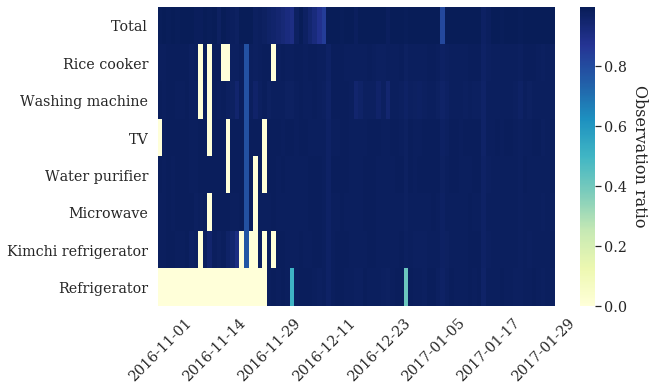

In [2]:
overall_fontsize = 14
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

sns.set(font_scale=1.3)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

fig, ax = plt.subplots(figsize=(fig_width,fig_height))
ax = sns.heatmap(summary, ax=ax, cmap="YlGnBu",cbar_kws={'label': 'Observation ratio'}, xticklabels=12)
fig.axes[-1].set_ylabel( 'Observation ratio', fontsize=16, rotation=-90, va="bottom")
plt.grid()
plt.xticks(rotation=45)
plt.show()
fig.savefig('../plots/observation_ratio_00.pdf', bbox_inches='tight', format='pdf', dpi=1000)